In [1]:
# Example using sunpy v6 to get and plot xrs

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [2]:
outdir='/Users/iain/sunpy/data/'

In [3]:
# Search for the data with Fido
trange=a.Time("2024-08-05 04:00","2024-08-05 06:00")
# Gives avg1m and flx1s for 16, 17, 18
rg = Fido.search(trange, a.Instrument("XRS"))
print(rg)
# Gives avg1m for 16, 17, 18
rg = Fido.search(trange, a.Instrument("XRS"),a.Resolution("avg1m"))
print(rg)
# Gives 1s for 18
rg = Fido.search(trange, a.Instrument("XRS"),a.Resolution("flx1s"),a.goes.SatelliteNumber(18))
print(rg)



Results from 1 Provider:

6 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-08-05 00:00:00.000 2024-08-05 23:59:59.999 ...     NOAA      flx1s
2024-08-05 00:00:00.000 2024-08-05 23:59:59.999 ...     NOAA      avg1m
2024-08-05 00:00:00.000 2024-08-05 23:59:59.999 ...     NOAA      flx1s
2024-08-05 00:00:00.000 2024-08-05 23:59:59.999 ...     NOAA      avg1m
2024-08-05 00:00:00.000 2024-08-05 23:59:59.999 ...     NOAA      flx1s
2024-08-05 00:00:00.000 2024-08-05 23:59:59.999 ...     NOAA      avg1m


Results from 1 Provider:

3 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/dat

In [4]:
# Then get the data
fg = Fido.fetch(rg,path=outdir)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

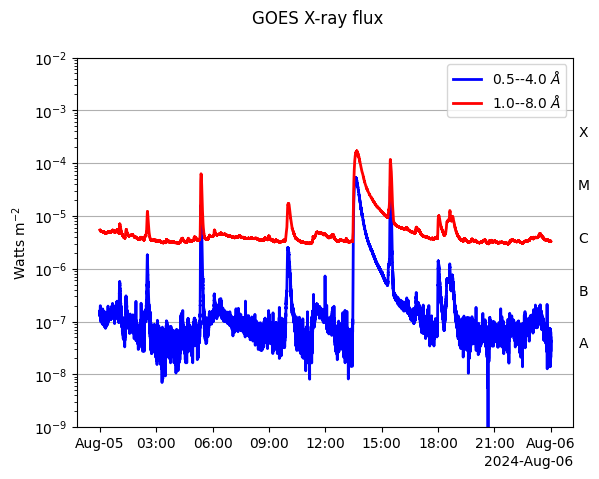

In [5]:
gdata = ts.TimeSeries(fg, concatenate=True)
gdata.peek()

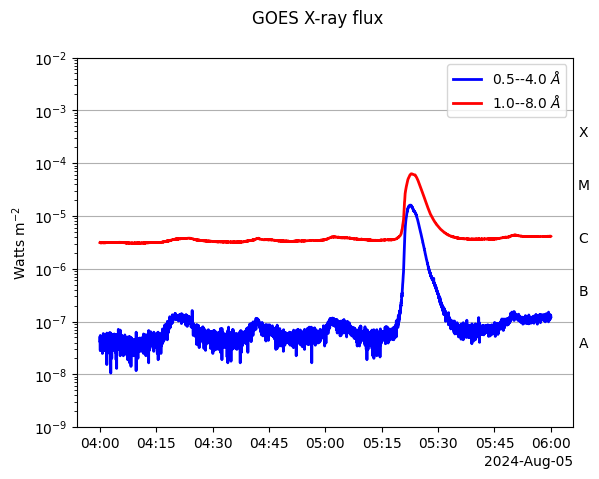

In [6]:
# Actual time range want
gdata_tr=gdata.truncate(trange.start.iso,trange.end.iso)
gdata_tr.peek()

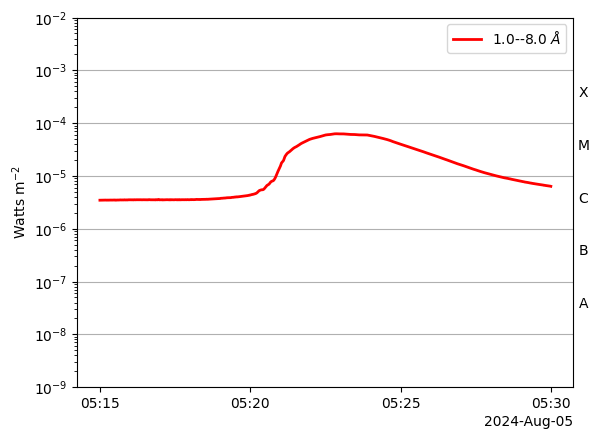

In [7]:
# And try another closer zoom
gdata_tr2=gdata.truncate("2024-08-05 05:15","2024-08-05 05:30")
fig, ax = plt.subplots()
gdata_tr2.plot(axes=ax, columns=["xrsb"])
plt.show()